# 28.11.2024 - Statistische Werten mit grundlegenden Python Methoden berechnen & Einführung in Python-Klassen
---
Wir werden mit einem Rückblick auf die Statistischen Kennzahlen *Durchschnitt*, *Varianz* und *Standardabweichung* starten.
Danach nutzen wir grundlegende Programmierkonzepte, um eigene Kennwerte zu berechnen. Zum Abschluss dieses Parts betrachten wir noch den *Median* und dessen Berechnung.

Im zweiten Abschnitt beginnen wir mit der Erarbeitung des Konzeptes der *Klassen* in Python. Klassen stellen ein wichtiges Konzept in Python und in vielen seiner Module dar, um Daten und dazu gehörende Methoden zu gruppieren.

Danach beschäftigen wir uns mit einigen grundlegen *statistischen Kennzahlen*. Diese können mit grundlegenden Python Programmiermethoden und/oder mit Numpy Methoden bestimmt werden.

* Zur Bearbeitung der Aufgaben können Sie benötigte Informationen zu Python-Befehlen und zu KI relevanten Bibliotheken (numpy, scikit, pandas) aus allen verfügbaren Quellen beziehen. Die meisten findet man natürlich über eine Suche im Internet, oder durch die Nutzung von KI chat-Systemen selbst.
Ein gutes Tutorial für den Start findet sich  z.B. hier: https://www.python-kurs.eu/numerisches_programmieren_in_Python.php

## Phase 1: Grundlegende statistische Werte

### Wiederholung der Aufgabe: Statistische Datenanalyse und Visualisierung
Erstelle ein Pandas-DataFrame, das die täglichen Temperaturen (in °C) über einen Zeitraum von 30 Tagen enthält. Die Temperaturen sollen zufällig generiert werden (zwischen 15°C und 30°C).  Zeichne anschließend mit Matplotlib ein Liniendiagramm, das die Temperaturentwicklung über die Tage hinweg zeigt.

Berechne mit NumPy den Durchschnitt, die Standardabweichung und die Varianz der Temperaturen.
Füge die Durchschnittstemperatur der Visualisierung hinzu.

Durchschnitt: 22.2 °C
Varianz: 15.693333333333332 °C
Standardabweichung: 3.9614812044654877 °C


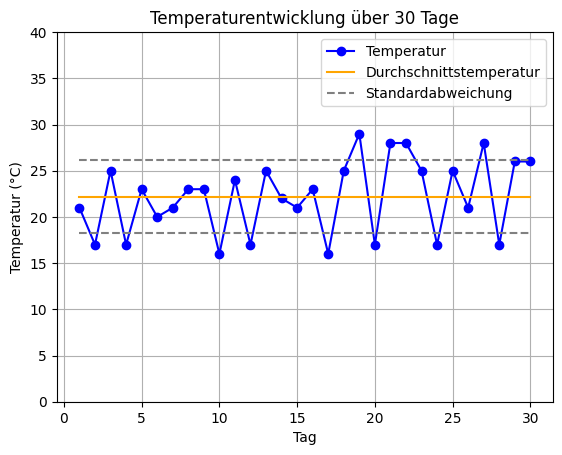

In [9]:
# --- Datenanalyse und Visualisierung mit Pandas, NumPy und Matplotlib

# Import benötigter Bibiliotheken
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Erstelle ein Pandas-DataFrame mit zufälligen Temperaturen
temperaturen = np.random.randint(15, 30, 30)
tage = np.arange(1, 31)
df = pd.DataFrame({'Tag': tage, 'Temperatur (°C)': temperaturen})

# Berechnungen mit NumPy
durchschnitt = np.mean(temperaturen)
stdabweichung = np.std(temperaturen)
varianz = np.var(temperaturen)

# Zeige die statistischen Werte an
print(f"Durchschnitt: {durchschnitt} °C")
print(f"Varianz: {varianz} °C")
print(f"Standardabweichung: {stdabweichung} °C")


# Zeichne das Liniendiagramm
plt.plot(df['Tag'], df['Temperatur (°C)'], marker='o', linestyle='-', color='blue', label='Temperatur')
# Zeichne den Durchschnitt
plt.plot(df['Tag'], np.ones(30)*durchschnitt, color='orange', label='Durchschnittstemperatur')
# Zeichne die Standardabweichung: 1x Standardabweichung über Durchschnitt, 1x Standardabweichung unter Durchschnitt
plt.plot(df['Tag'], (np.ones(30)*durchschnitt + stdabweichung), color='gray', linestyle='--', label='Standardabweichung')
plt.plot(df['Tag'], (np.ones(30)*durchschnitt - stdabweichung), color='gray', linestyle='--')
plt.ylim(0,40)
plt.xlabel('Tag')
plt.ylabel('Temperatur (°C)')
plt.title('Temperaturentwicklung über 30 Tage')
plt.legend()
plt.grid(True)
plt.show()

### Zusammenhang Varianz und Standardabweichung

Die Formel für die Berechnung der *Varianz* $ \sigma^2 $ einer Stichprobe lautet:
$$
\sigma^2 = \frac{1}{n} \sum_{i=1}^{n} (x_i - \mu)^2
$$
Dabei ist:
- $ \sigma^2 $ die Varianz,
- $ n $ die Anzahl der Datenpunkte,
- $ x_i $ der i-te Datenpunkt,
- $ \mu $ der Mittelwert der Datenpunkte.

Die *Standardabweichung* $ \sigma $ berechnet sich aus der Varianz: Sie ist die Quadratwurzel der Varianz.
D.h.:
$$
\sigma = \sqrt{\sigma^2}
$$

### 1. Aufgabe: Auswerten von Daten

Die Numpy Befehle zur Berechnung des Durchschnitts, der Standardabweichung und der Varianz sind 3 von vielen Berechnungsmethoden, die in Numpy bereits vordefinierte und verfügbar sind. Etwas "exotischere" Berechungen und Datenabfragen kann man selbst in Python programmieren.

Nutzen Sie wieder einen zufälligen Temperaturdatensatz über 30 Tage. Bestimmen Sie - mit oder ohne Hilfe von existierenden Numpy Funktionen - folgendes:
1.  Die niedrigste und die höchste Temperatur im Datensatz.
2.  Die Durchschnittstemperatur, und für jeden Tag die Abweichung vom Durchschnitt:<br> <!-- br oder 2 Leerzeichen, damit Unterliste erkannt wird -->
    a) absolut: *TempAbweichungAbs = Temp - Durchschnitt*  
    b) relativ: *TempAbweichungRel = (Temp / Durchschnitt) - 1*
3.  Zählen Sie die Anzahl der Tage, an denen die Temperatur über 21°C lag.
4.  Rechnen Sie die gegebenen Temperaturwerte um in Fahrenheit.

Die Ergebnisse der Punkte 1, 2a und 4 können der Visualisierung hinzugefügt werden.

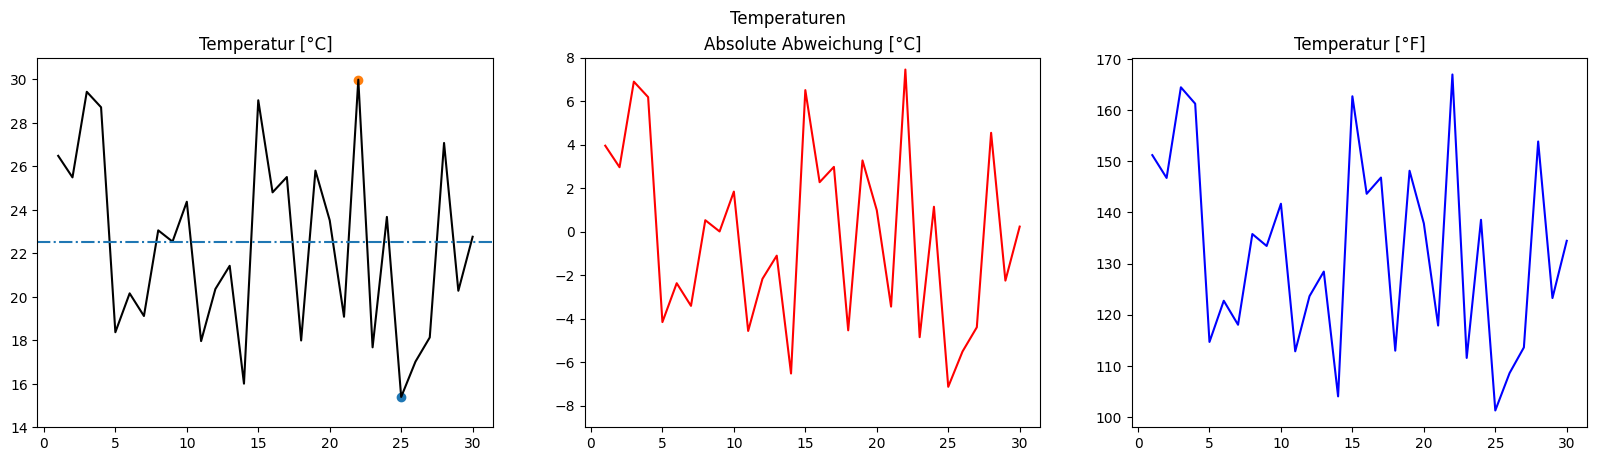

In [ ]:
# --- Auswerten von Daten
# Import der Bibliotheken
import numpy as np
import matplotlib.pyplot as plt
 
# Eigene Funktion definieren
def fahrenheit (temp_C):
    temp_F = (temp_C * 4.5) + 32
    return temp_F

# Erstelle der zufälligen Temperaturen
temp = np.random.uniform(15, 30, (30,))
days = np.arange(1, 31)

# 1. Höchste und niedrigste Temperatur
count = 1
count_min = 0
min = 40
count_max = 0
max = 0
for element in temp:
    # Niedrigste Temperatur
    if element < min:
        min = element
        count_min = count
    # Höchste Temperatur
    if element > max:
        max = element
        count_max = count
    count += 1

# 2. Durchschnittstemperatur und Abweichungen berechnen
avsum   = 0
dif_abs = []
dif_rel = []
# Durchschnitt
for avelem in temp:
    avsum += avelem
average = sum / temp.size

for abselem in temp:
    dif_abs.append(abselem - average)

for relelem in temp:
    dif_rel.append((relelem/average)-1)

# 3. Warme Tage zählen
warm = 0
for warmelem in temp:
    if warmelem > 21: 
        warm += 1
print(warm)
# 4. Temperaturen in Fahrenheit umrechnen 
temp_degF = []
for tempelem in temp:
    temp_degF.append(fahrenheit (tempelem))

# 5. Plotten
fig, axs = plt.subplots(1,3)
fig.set_figwidth(20)
fig.suptitle("Temperaturen")
axs[0].plot(days, temp, color = 'black', linestyle='-')
axs[0].set_title('Temperatur [°C]')
axs[0].axhline(average, linestyle='-.')
axs[0].scatter(count_min, min)
axs[0].scatter(count_max, max)
axs[1].plot(days, dif_abs, color = 'red', linestyle='-')
axs[1].set_title('Absolute Abweichung [°C]')
axs[2].plot(days, temp_degF, color = 'blue', linestyle='-')
axs[2].set_title('Temperatur [°F]')
plt.show()


### Der Median

Neben dem Mittelwert gibt es noch eine weiter Kennzahl, die herangezogen werden kann, um die "zentrale Lage" von Daten zu beschreiben: Der *Median*. Während der Mittelwert die Summe aller Werte durch die Anzahl der Werte teilt, ist der Median der mittlere Wert einer geordneten Datenreihe.

Beispiel: Sieben unsortierte Messwerte 4, 1, 15, 2, 4, 5, 4 werden nach Größe sortiert: 1, 2, 4, 4, 4, 5, 15. Der Median  ist der Wert an der mittleren Stelle, also 4. Wenn im Beispiel eine 4 durch einen Ausreißer 46 ersetzt wird, ändert sich der Median nicht: 1, 2, 4, 4, 5, 15, 46. Das arithmetische Mittel hingegen springt von 5 auf 11.



### 2. Aufgabe

Der Median kann auf folgende Weise bestimmt werden:
1. Alle Werte werden (aufsteigend) geordnet.
2. Wenn die Anzahl der Werte ungerade ist, ist die mittlere Zahl der Median.
3. Wenn die Anzahl der Werte gerade ist, wird der Median meist als arithmetisches Mittel der beiden mittleren Zahlen definiert, die dann Unter- und Obermedian heißen.

Implementieren Sie die Berechung des Medians von einem Numpy Array als **Funktion** in Python. Die Funktion soll ein array übergeben bekommen, und die obigen 3 Schritte zur Bestimmung des Medians durchführen. Der berechnete Median soll von der Funktion zurückgegeben werden. Benutzen Sie für Schritt 1 eingebaute Numpy Funktionen zur Sortierung eines Arrays.
Testen Sie Ihre Median-Funktion an einem array mit von Ihnen gewählten Beispieldaten.

*Hinweis: Numpy stellt (natürlich) bereits eine Funktion zur Verfügung, die den Median eines arrays berechnet. Zum Zwecke des Verständnisses von Median und  Python-Programmiergrundlagen ist aber eine Implementierung wie in der Aufgabenstellung beschrieben sicherlich förderlich.*

In [ ]:
# Funktion berechneMedian

    # 1. Array aufsteigend sortieren
    
    # 2. Anzahl der Elemente
    
    # 3. Median bestimmen



# Hauptprogramm


### 3. Aufgabe - Vergleich von Sensordaten zur Fehleranalyse

In dieser Aufgabe geht es um den Vergleich der Fehlerraten von zwei Luftqualitätssensoren, **Sensor A** und **Sensor B**. 

Erstellen Sie zwei Arrays, die die unten stehenden Fehlerraten von Sensor A und Sensor B für 10 unterschiedliche Testmessungen enthalten. Berechnen Sie für beide Sensoren die statistischen Kennwerte 
   - Durchschnittsfehler
   - Maximaler Fehler
   - Median
   
Visualisieren Sie die Fehlerraten beider Sensoren und zeigen Sie die Differenzbereiche an.
Welche Rückschlüsse geben die Werte über die Sensoreigenschaften?

| Index | Sensor A | Sensor B |
|-------|----------|----------|
| 0     | 1.2      | 1.5      |
| 1     | 1.8      | 1.4      |
| 2     | 1.9      | 2.3      |
| 3     | 1.0      | 1.7      |
| 4     | 3.5      | 2.8      |
| 5     | 2.0      | 1.9      |
| 6     | 2.8      | 2.9      |
| 7     | 1.5      | 2.1      |
| 8     | 2.3      | 2.6      |
| 9     | 3.0      | 2.8      |


In [ ]:
# Datensätze als arrays

# Berechnungen

# Ausgabe der Statistiken

# Visualisierung



## Phase 2: Einführung in objektorientierten Programmierung und Klassen in Python

Das Konzept der *objektorientierten Programmierung (OOP)* basiert darauf, beim Programmieren eine objektbezogene Sichtweise einzunehmen. D.h., dass man Daten und die dazugehörigen Funktionen, die auf diesen Daten arbeiten, in sogenannten *Objekten* bündelt. Objekte können dabei ganz realitätsnahe Dinge sein (z. B. ein Auto) oder abstrakte Elemente eines Programms (z. B. ein Array in NumPy) repräsentieren.

In Python dienen *Klassen* als Baupläne für Objekte. Sie legen fest, welche *Attribute* (Daten) und *Methoden* (Funktionen) ein Objekt besitzt und wie diese Methoden auf die Attribute zugreifen oder sie verändern. Klassen ermöglichen es so, sowohl reale als auch abstrakte Konzepte strukturiert und wiederverwendbar im Code abzubilden.


### Beispiel für das Objekt Auto

Eine Klasse, die einen sehr einfachen Aufbau des Objekts Auto beschreibt, könnte so aussehen:

<img src="./Klasse_Auto_einfach.png" alt="Bild von Klassendefinition" width="400" />

In Python wird diese Klasse wie folgt definiert:

In [ ]:
class Auto:
    # Methoden:

    def __init__(self, marke, modell, kilometerstand=0): # Der Konstruktor initialisiert die Attribute für Marke, Modell und Kilometerstand.
        self.marke = marke
        self.modell = modell
        self.kilometerstand = kilometerstand
    
    def fahren(self): # Die Methode 'fahren' erhöht den Kilometerstand des Autos.
        self.kilometerstand += 5


# Objekt erstellen
altes_auto = Auto("Opel", "Kadett", 220000)
neues_auto = Auto("Citroen", "C1")

# Mit den Objekten arbeiten
print("Zusammenfassung altes Auto:", altes_auto.marke, altes_auto.modell, ", Kilometerstand:", altes_auto.kilometerstand, "km")
print("Aktueller Kilometerstand des neuen Autos:", neues_auto.kilometerstand, "km")
neues_auto.fahren()
neues_auto.fahren()
print("Aktueller Kilometerstand des neuen Autos:", neues_auto.kilometerstand, "km")

Zusammenfassung altes Auto:  Opel Kadett , Kilometerstand:  220000 km
Aktueller Kilometerstand des neuen Autos: 0 km
Aktueller Kilometerstand des neuen Autos: 10 km


Noch ein Wort zu den Begrifflichkeiten:

- `Auto` ist die *Klasse*. Es handelt sich um eine abstrakte Beschreibung, bzw. einen Bauplan für alle Objekte dieser Klasse.
- `altes_auto` und `neues_auto` sind *Instanzen* der Klasse Auto. Sie sind die konkreten Objekte.


### 4. Aufgabe - Klasse zur Beschreibung und Nutzung von Holzbauteilen

In dieser Aufgabe geht es um (Holz)bauteile. Jedes Bauteil ist mit seiner Länge und Breite angegeben.
Um Informationen über Materialbedarf und Passgenauigkeit zu bekommen, interessieren auch der daraus resultierende Flächeninhalt und Umfang eines jeden Bauteils.

Erstellen Sie ein Python Programm, das im objektorientierten Stil (d.h. durch Nutzung einer Klasse :) ) unten angegebene Bauteile im code handhabt und den Umfang und den Flächeninhalt berechnet.

| Bauteil Nr. | Länge (m) | Breite (m) |
|-------------|-----------|------------|
| 1           | 2         | 3          |
| 2           | 0.5       | 0.8        |
| 3           | 0.2       | 0.1        |
| 4           | 2.5       | 2.5        |
| 5           | 1         | 1.8        |


In [58]:
# Klassendefinition
class Bauteil:
    # Konstruktor
    def __init__(self, nummer, laenge, breite):
        self.nummer = nummer
        self.laenge = laenge
        self.breite = breite

    # Methoden
    def flaeche(self):
        flaeche = self.laenge * self.breite
        return flaeche
    
    def umfang(self):
        umfang = 2 * (self.laenge + self.breite)
        return umfang

# Liste von Bauteilen (Länge und Breite laut der Tabelle)
A = Bauteil(1, 2, 3)
B = Bauteil(2, 0.5, 0.8)
C = Bauteil(3, 0.2, 0.1)
D = Bauteil(4, 2.5, 2.5)
E = Bauteil(5, 1, 1.8)
print ('Bauteilnummer:', A.nummer, 'Länge:', A.laenge, 'Breite:', A.breite)
print ('Bauteilnummer:', B.nummer, 'Länge:', B.laenge, 'Breite:', B.breite)
print ('Bauteilnummer:', C.nummer, 'Länge:', C.laenge, 'Breite:', C.breite)
print ('Bauteilnummer:', D.nummer, 'Länge:', D.laenge, 'Breite:', D.breite)
print ('Bauteilnummer:', E.nummer, 'Länge:', E.laenge, 'Breite:', E.breite)

# Ausgabe der Informationen zu jedem Bauteil
print ('Teil_1')
print ('Fläche:', A.flaeche(), 'Umfang:', A.umfang())
print ('Teil_2')
print ('Fläche:', B.flaeche(), 'Umfang:', B.umfang())
print ('Teil_3')
print ('Fläche:', C.flaeche(), 'Umfang:', C.umfang())
print ('Teil_4')
print ('Fläche:', D.flaeche(), 'Umfang:', D.umfang())
print ('Teil_5')
print ('Fläche:', E.flaeche(), 'Umfang:', E.umfang())

A.__breite = 10
print ('Bauteilnummer:', A.nummer, 'Länge:', A.laenge, 'Breite:', A.breite)
print ('Fläche:', A.flaeche(), 'Umfang:', A.umfang())


Bauteilnummer: 1 Länge: 2 Breite: 3
Bauteilnummer: 2 Länge: 0.5 Breite: 0.8
Bauteilnummer: 3 Länge: 0.2 Breite: 0.1
Bauteilnummer: 4 Länge: 2.5 Breite: 2.5
Bauteilnummer: 5 Länge: 1 Breite: 1.8
Teil_1
Fläche: 6 Umfang: 10
Teil_2
Fläche: 0.4 Umfang: 2.6
Teil_3
Fläche: 0.020000000000000004 Umfang: 0.6000000000000001
Teil_4
Fläche: 6.25 Umfang: 10.0
Teil_5
Fläche: 1.8 Umfang: 5.6
Bauteilnummer: 1 Länge: 2 Breite: 3
Fläche: 6 Umfang: 10


![alt text](image.png)
![alt text](image-1.png)

### Etwas abstraktere Klassen

Klassen werden in Python nicht nur für die modellierung von Objekten aus der realen Welt verwendet. Auch programmierte Code-Strukturen, die einen zusammenhängenden Kontext haben, können als Objekt aufgefasst werden.

Z.B. ist ein NumPy-Array eine spezielle Art von Datenstruktur, die effizient große Mengen an numerischen Daten speichert und eine Vielzahl von Funktionen zur Verfügung stellt, um mit diesen Daten zu arbeiten.
Konkrete NumPy-Arrays, die im Code benutzt werden, sind Instanzen der Klasse numpy.ndarray. Diese Klasse enthält eine Vielzahl von Methoden und Attributen, die speziell für numerische Berechnungen und Datenmanipulationen entwickelt wurden. Diese Methoden und Attribute können auf den jeweiligen Arrays angewendet werden, um zum Beispiel die Summe, das Maximum und das Minimum der Elemente zu berechnen.

##### Ein paar Attribute der Klasse numpy.ndarray:
- `ndarray.shape`: Gibt die Dimensionen des Arrays zurück (z. B. die Anzahl der Zeilen und Spalten bei einem 2D-Array).
- `ndarray.size`: Gibt die Gesamtzahl der Elemente im Array zurück.
- `ndarray.dtype`: Gibt den Datentyp der Elemente im Array zurück.

##### Ein paar Methoden der Klasse numpy.ndarray::
- `sum()`: Berechnet die Summe aller Elemente im Array.
- `max()`: Gibt das größte Element im Array zurück.
- `min()`: Gibt das kleinste Element im Array zurück.



### 5. Aufgabe: Ausprobieren

Erstellen Sie das 2-dimensionales numpy array: 
$
\begin{pmatrix}
1 & 2 & 3 \\
4 & 5 & 6
\end{pmatrix}
$.

Fragen Sie oben angegebene Attribute des arrays ab, und rufen Sie die oben angegebenen Methoden des arrays auf.
Fügen Sie dem array eine Zeile hinzu, und beobachten Sie, wie sich die Attribute und die Rückgabewerte der Methoden ändern.

In [ ]:
# Erstellen eines 2D-Arrays

# Attribut: Form des Arrays (shape)

# Attribut: Anzahl der Elemente im Array (size)

# Methode: Berechnung der Summe der Elemente im Array (über das gesamte Array)

# Methode: Berechnung des Maximums der Elemente im Array (über das gesamte Array)

# Methode: Berechnung des Minimums der Elemente im Array (über das gesamte Array)


Shape des 2D-Arrays: (2, 3)
Anzahl der Elemente im 2D-Array: 6
Summe der Elemente im 2D-Array: 21
Maximalwert im 2D-Array: 6
Minimalwert im 2D-Array: 1


### 6. Aufgabe: Klassen für´s eigene data handling

An dieser Stelle nutzen wir eine Klasse, um unsere Temperaturdaten-Statistik zu strukturieren. Entwerfen Sie dazu eine Klasse *TempStat*. Diese Klasse soll Daten und Funktionen zusammenbringen, die sich auf die Analyse von Temperaturdaten beziehen. Die Klasse soll folgende Daten und Funktionen enthalten:
- Einen Temperaturdatensatz, bestehend aus 30 Temperaturwerten in einem array,
- Durchschnitt und Standardabweichung der Temperaturdaten,
- Eine Methode, die alle Temperaturdaten mit dem Faktor $p$ multipliziert. $p$ soll als Parameter der Methode übergeben werden können.
- Eine Methode zum direkten plotten aller Daten.

Nutzen Sie die Klasse, indem Sie eine oder mehrere Instanzen dieser Klasse erzeugen.  die sich auf 3 Monate beziehen. Die Temperaturdaten der 3 Monate können Sie zufällig erzeugen lassen.

In [ ]:
# Klassendefinition

# Beispielnutzung der Klasse
